In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [4]:
data = pd.read_csv('./data/Iris.csv')
data

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data['species'] = data['species'].replace(
    {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

In [7]:
data

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [21]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']], data['species'], test_size=0.3)

In [22]:
x_train

,SepalLength,SepalWidth,PetalLength,PetalWidth
23,5.1,3.3,1.7,0.5
138,6.0,3.0,4.8,1.8
84,5.4,3.0,4.5,1.5
67,5.8,2.7,4.1,1.0
94,5.6,2.7,4.2,1.3
...,...,...,...,...
63,6.1,2.9,4.7,1.4
145,6.7,3.0,5.2,2.3
106,4.9,2.5,4.5,1.7
120,6.9,3.2,5.7,2.3


In [23]:
y_train

23     1
138    3
84     2
67     2
94     2
      ..
63     2
145    3
106    3
120    3
15     1
Name: species, Length: 105, dtype: int64

In [24]:
model = linear_model.LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=120, verbose=True)
model.fit(x_train, y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15354D+02    |proj g|=  7.62333D+01

At iterate   50    f=  2.28710D+01    |proj g|=  3.65247D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     78     91      1     0     0   7.567D-04   2.272D+01
  F =   22.720865879850347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


LogisticRegression(max_iter=120, multi_class='multinomial', verbose=True)

In [25]:
model.predict(x_test)

array([2, 3, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3,
       3, 2, 3, 3, 2, 2, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3,
       1])

In [26]:
x_test

,SepalLength,SepalWidth,PetalLength,PetalWidth
119,6.0,2.2,5.0,1.5
126,6.2,2.8,4.8,1.8
12,4.8,3.0,1.4,0.1
9,4.9,3.1,1.5,0.1
47,4.6,3.2,1.4,0.2
131,7.9,3.8,6.4,2.0
74,6.4,2.9,4.3,1.3
128,6.4,2.8,5.6,2.1
133,6.3,2.8,5.1,1.5
59,5.2,2.7,3.9,1.4


In [27]:
# accuracy
model.score(x_test, y_test)

0.9555555555555556

In [28]:
predicted_output = model.predict(x_test)
predicted_output

array([2, 3, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3,
       3, 2, 3, 3, 2, 2, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3,
       1])

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 14]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

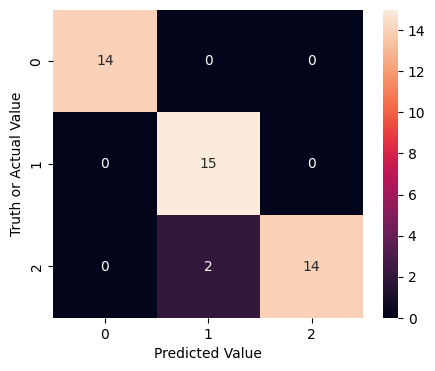

In [30]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [32]:
from sklearn import metrics
y_pred_proba = model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: multiclass format is not supported